Import the dataset and Libraries

In [234]:
import warnings
warnings.filterwarnings('ignore')

In [235]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
from sklearn import metrics
import sys
pd.options.display.float_format = '{:,.2f}'.format

In [236]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [238]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,"5,000.00","2,500.50","1,443.52",1.00,"1,250.75","2,500.50","3,750.25","5,000.00"
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,"5,000.00","93,152.50","2,121.85","9,307.00","91,911.00","93,437.00","94,608.00","96,651.00"
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,"5,000.00",0.10,0.29,0.00,0.00,0.00,0.00,1.00


In [239]:
df[(df['Experience']==-3)|(df['Experience']==-2)|(df['Experience']==-1)].count()


ID                    52
Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

Age : Minimum is 45, maximum is 67.
Experience : 52 records has -3,-2,-1 as experience, that should be replaced with 0 as there is no negative experience.
Income: Minimum is 8.0, maximum is 224 and all the values are poulated
Mortgage : Has minimum value of Zero, i.e the customers already paid or doesn't have mortgage loan with the bank


Exploratory Data Analysis

Number of unique values in each column

In [240]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Id is a continuous number and can be removed from the data.
Securities account,CD account, online and credit card data types are numbers integers and will be converted into categorical.

Number of people with Zero Mortgage

In [241]:
#df['Mortgage'].value_counts().loc[0]
print('Number of Zeros in Mortgage Is : ', df['Mortgage'].value_counts().loc[0])


Number of Zeros in Mortgage Is :  3462


Number of people with zero credit card spending per month

In [242]:
print('Number of people with zero credit card spending per month Is : ', df['CCAvg'].value_counts().loc[0])

Number of people with zero credit card spending per month Is :  106


Value counts of all categorical columns.

In [243]:
print('Value counts of all categorical columns')
print()
for i in ('Personal Loan','Securities Account','CD Account','Online','CreditCard'):
    print (df[i].value_counts(normalize=True))
    print()

Value counts of all categorical columns

0   0.90
1   0.10
Name: Personal Loan, dtype: float64

0   0.90
1   0.10
Name: Securities Account, dtype: float64

0   0.94
1   0.06
Name: CD Account, dtype: float64

1   0.60
0   0.40
Name: Online, dtype: float64

0   0.71
1   0.29
Name: CreditCard, dtype: float64



Univariate and Bivariate 

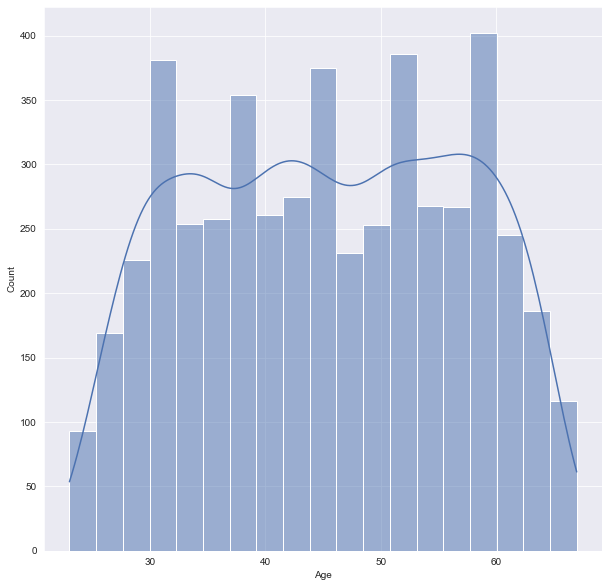

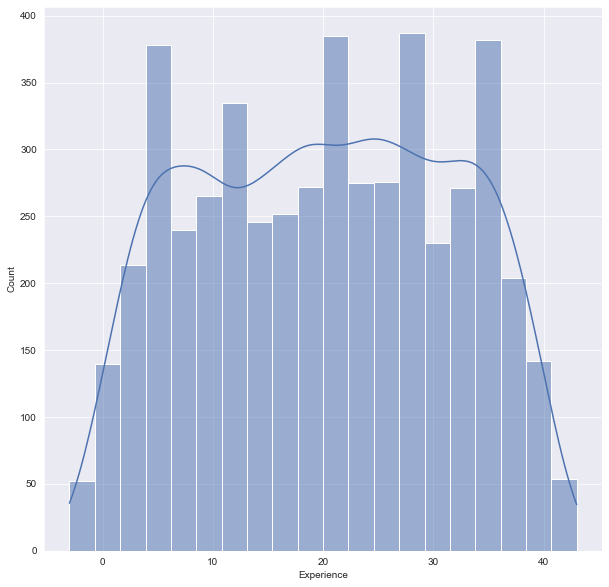

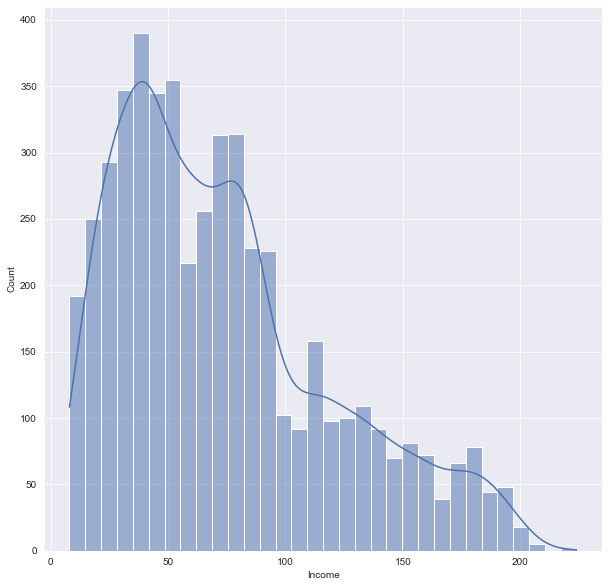

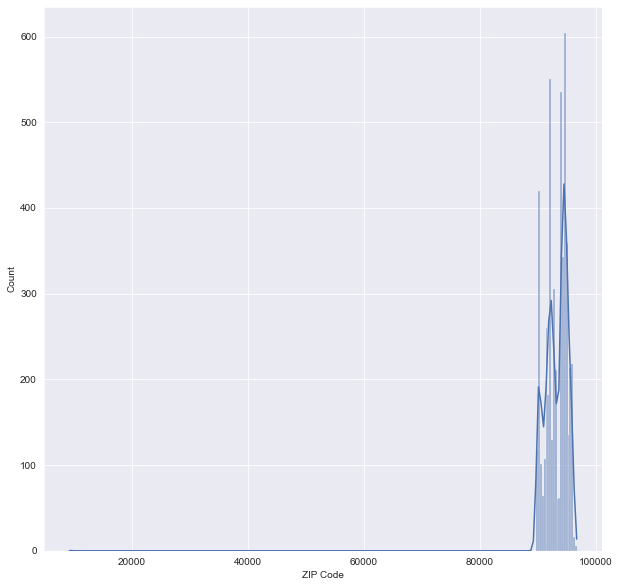

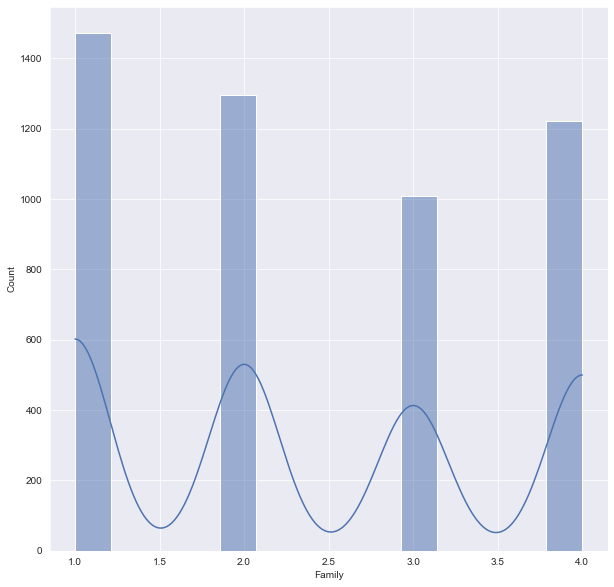

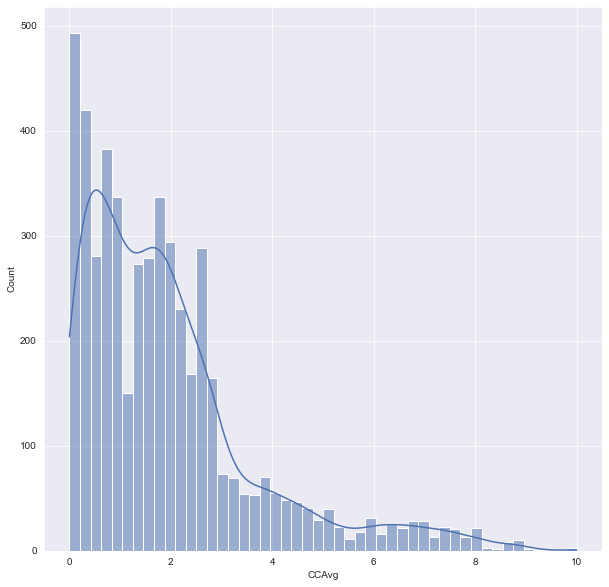

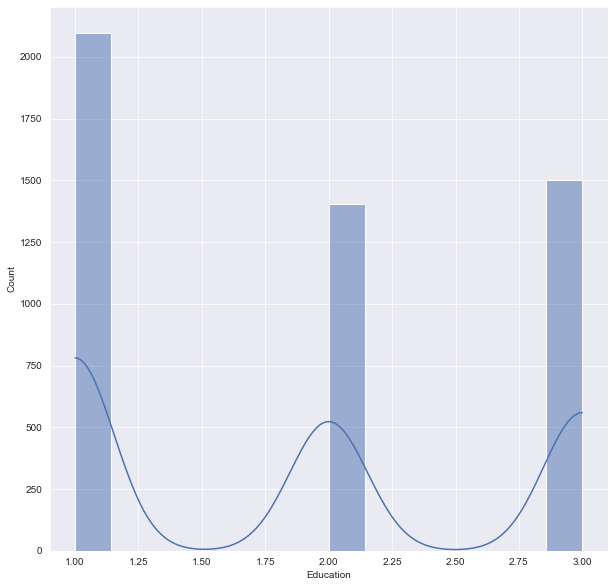

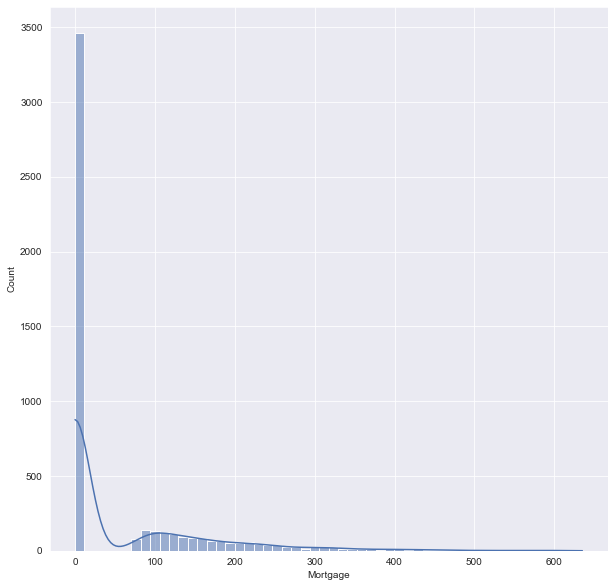

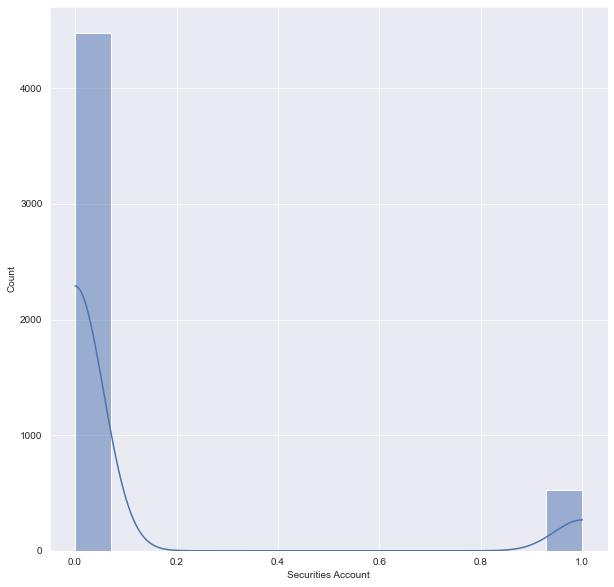

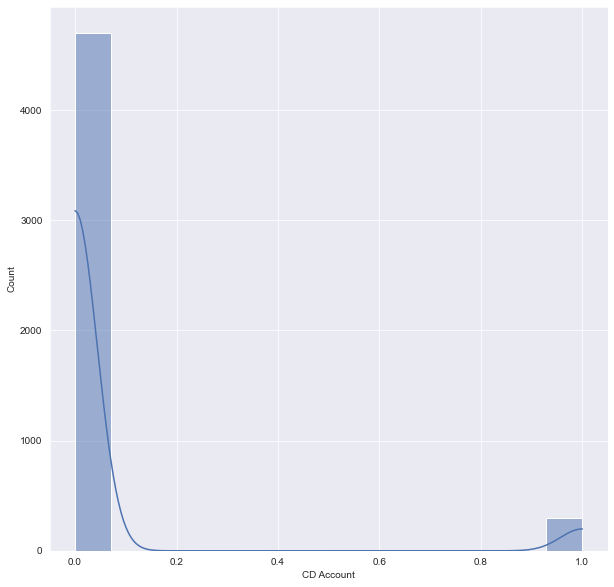

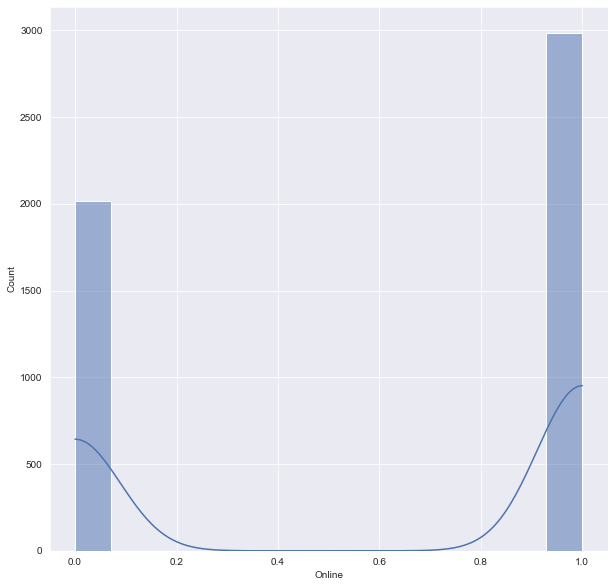

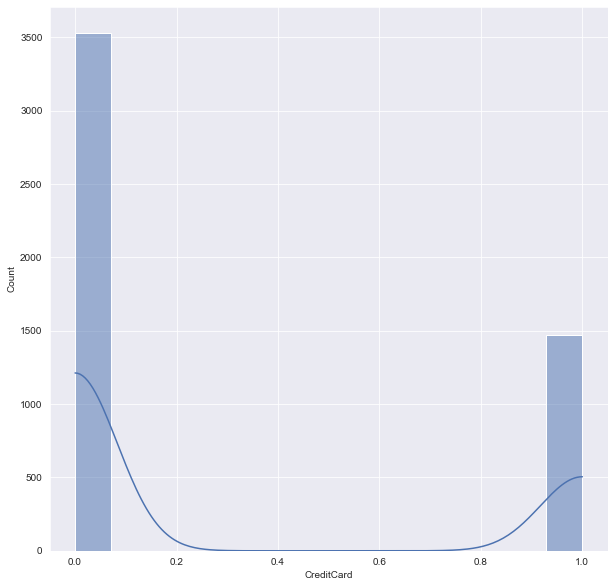

In [244]:
for i in ('Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard'):
    #df[i].hist(stacked=False, bins=100, figsize=(12,30))
    sns.set({'figure.figsize': (10,10)})
    sns.histplot(df[i], kde=True)
    plt.show()

Univariate analysis
1) Some has experience which is less than zero
2) CCAvg is in between 0-3 for most of them.
3) Most of them has Mortgage with zero value.
4) Most of them doesn't have security accounts.
5) Most of them doesn't have CD accounts.
6) Most of them are using online account feature.
7) Most of them doesn't have the credit card accounts.

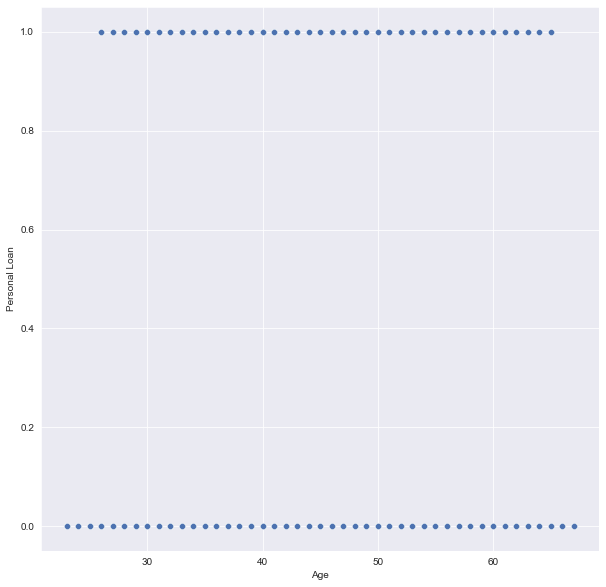

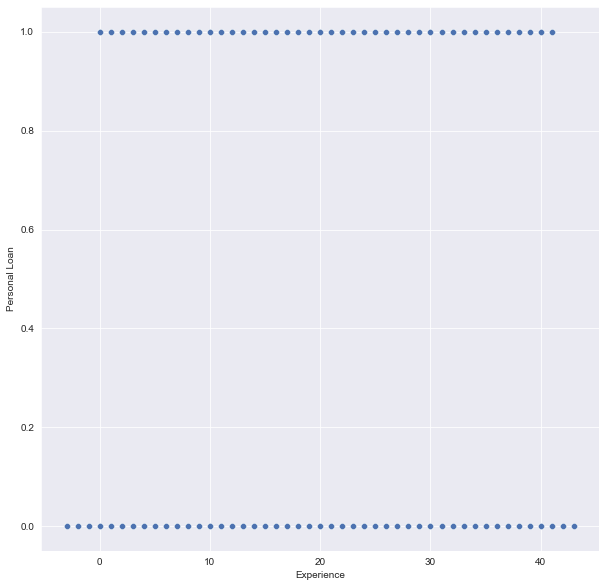

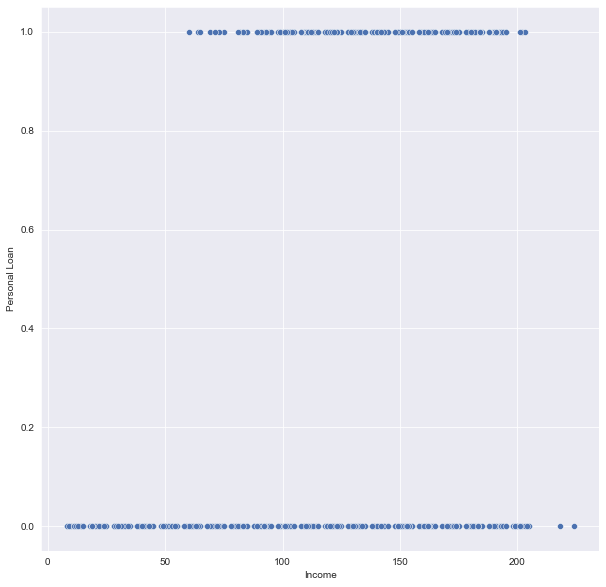

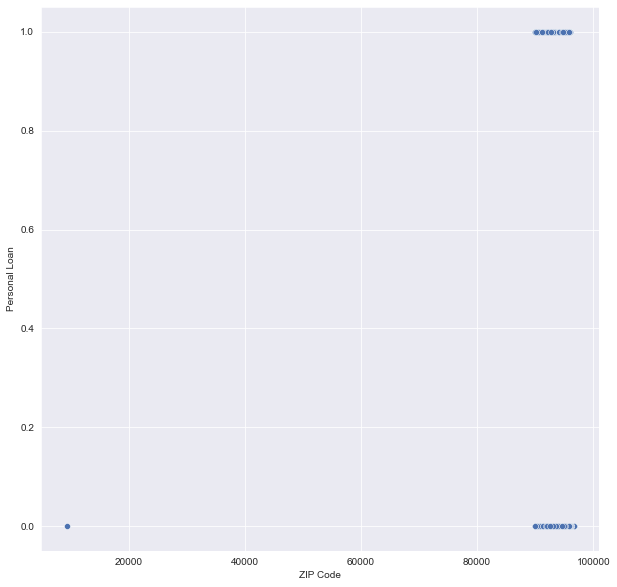

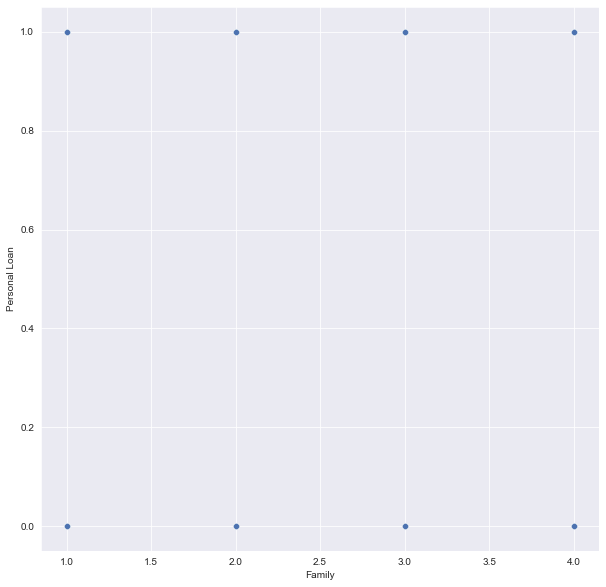

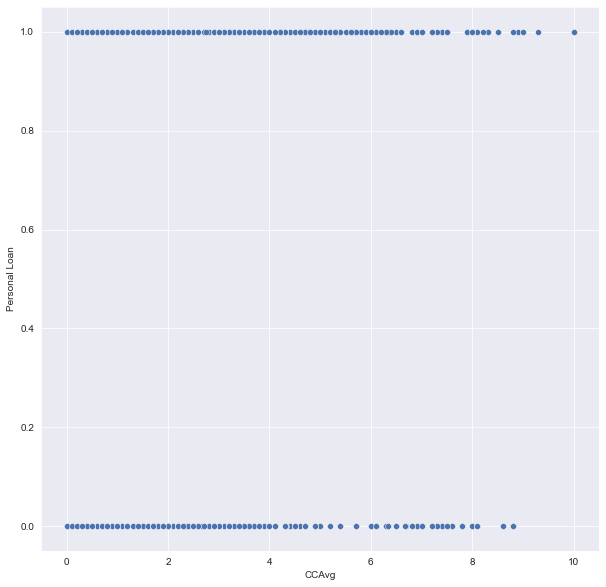

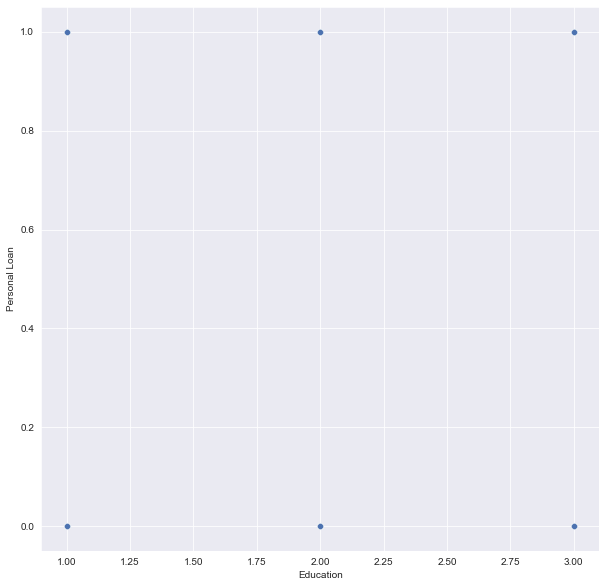

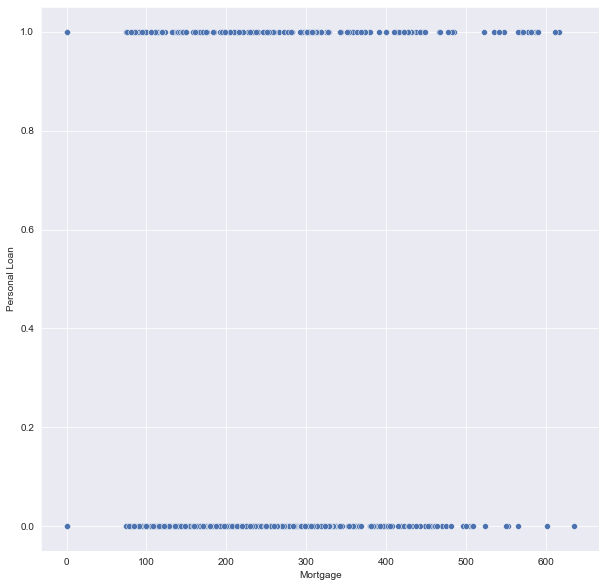

In [245]:
for i in ('Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage'):
    sns.set({'figure.figsize': (10,10)})
    sns.scatterplot(x =df[i], y=df['Personal Loan'])
    plt.show()

Bivariate Analysis : 
Age,Experience,Income,CCAvg,Mortgage has form the Sigmoid curve.

In [246]:
df.corr() # It will show correlation matrix 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.00,-0.01,-0.01,-0.02,0.01,-0.02,-0.02,0.02,-0.01,-0.02,-0.02,-0.01,-0.00,0.02
Age,-0.01,1.00,0.99,-0.06,-0.03,-0.05,-0.05,0.04,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,-0.01,0.99,1.00,-0.05,-0.03,-0.05,-0.05,0.01,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.02,-0.06,-0.05,1.00,-0.02,-0.16,0.65,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00
ZIP Code,0.01,-0.03,-0.03,-0.02,1.00,0.01,-0.00,-0.02,0.01,0.00,0.00,0.02,0.02,0.01
Family,-0.02,-0.05,-0.05,-0.16,0.01,1.00,-0.11,0.06,-0.02,0.06,0.02,0.01,0.01,0.01
CCAvg,-0.02,-0.05,-0.05,0.65,-0.00,-0.11,1.00,-0.14,0.11,0.37,0.02,0.14,-0.00,-0.01
Education,0.02,0.04,0.01,-0.19,-0.02,0.06,-0.14,1.00,-0.03,0.14,-0.01,0.01,-0.02,-0.01
Mortgage,-0.01,-0.01,-0.01,0.21,0.01,-0.02,0.11,-0.03,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal Loan,-0.02,-0.01,-0.01,0.50,0.00,0.06,0.37,0.14,0.14,1.00,0.02,0.32,0.01,0.00


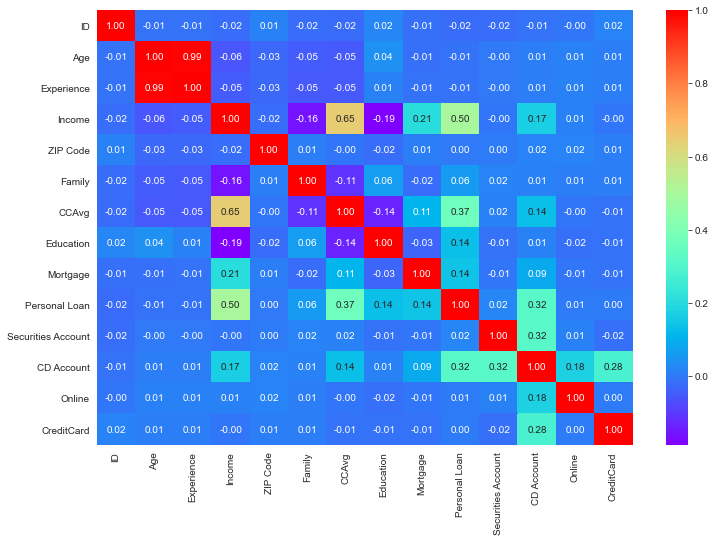

In [247]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

Heatmap Analysis :
1) Age and Experience has a good positive correlation.
2) Income, CD Account, CCAvg has good positive correlation with personal loan.
3) Education and mortgage has a weak positive correlation to personal loan.
4) Age and experience has weak negative correlation with Personla Account.

Prepare input data for the model.

Converting Securities Account, CD Account,Online,CreditCard and Education to categorical variables

In [248]:
df['Securities Account'] = df['Securities Account'].astype('category')
df['CD Account'] = df['CD Account'].astype('category')
df['Online'] = df['Online'].astype('category')
df['CreditCard'] = df['CreditCard'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Family'] = df['Family'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   int64   
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(7)
memory usage: 342.6 KB


In [249]:
X=df.drop(columns=['ID','ZIP Code','Mortgage','Personal Loan']) #Dropping continuous 'Age' and 'Credit amount' and keeping the categorical ones we created above
Y=df['Personal Loan']

Replacing -1,-2,-3 in experience with 0
Replacing Education with Categorical variables 


In [250]:
X["Experience"].replace({-1: 0, -2: 0, -3: 0}, inplace=True)
X["Education"].replace({1: "Undergrad", 2: "Graduate", 3: " Advanced"}, inplace=True)

Creating Dummy Variables

In [251]:
X=pd.get_dummies(data=X,drop_first=True)

In [252]:
X.head(10)

,Age,Experience,Income,CCAvg,Family_2,Family_3,Family_4,Education_Graduate,Education_Undergrad,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,1,49,1.60,0,0,1,0,1,1,0,0,0
1,45,19,34,1.50,0,1,0,0,1,1,0,0,0
2,39,15,11,1.00,0,0,0,0,1,0,0,0,0
3,35,9,100,2.70,0,0,0,1,0,0,0,0,0
4,35,8,45,1.00,0,0,1,1,0,0,0,0,1
5,37,13,29,0.40,0,0,1,1,0,0,0,1,0
6,53,27,72,1.50,1,0,0,1,0,0,0,1,0
7,50,24,22,0.30,0,0,0,0,0,0,0,0,1
8,35,10,81,0.60,0,1,0,1,0,0,0,1,0
9,34,9,180,8.90,0,0,0,0,0,0,0,0,0


Split the data into training and test set in the ratio of 70:30 respectively

In [253]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

In [254]:
Y_train.value_counts(normalize=True)

0   0.90
1   0.10
Name: Personal Loan, dtype: float64

In [255]:
Y_test.value_counts(normalize=True)

0   0.91
1   0.09
Name: Personal Loan, dtype: float64

Predict Target Variable for Test Data using Sklearn

In [256]:
from sklearn.linear_model import LogisticRegression

In [257]:
model=LogisticRegression()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)


In [258]:
np.set_printoptions(threshold=sys.maxsize)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [259]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, roc_auc_score, classification_report,confusion_matrix

Metric scores

In [260]:
print("recall_Score    :",recall_score(Y_test,Y_pred))
print()
print("accuracy_score  :",accuracy_score(Y_test,Y_pred))
print()
print("precision_score :",precision_score(Y_test,Y_pred))
print()
print("f1_score        :",f1_score(Y_test,Y_pred))
print()
print("roc_auc_score   :",roc_auc_score(Y_test,Y_pred))

recall_Score    : 0.6666666666666666

accuracy_score  : 0.9646666666666667

precision_score : 0.9292929292929293

f1_score        : 0.7763713080168776

roc_auc_score   : 0.830763582966226


Confusion metrics and heatmap

In [261]:
cm = confusion_matrix( Y_test,Y_pred)
cm

array([[1355,    7],
       [  46,   92]], dtype=int64)

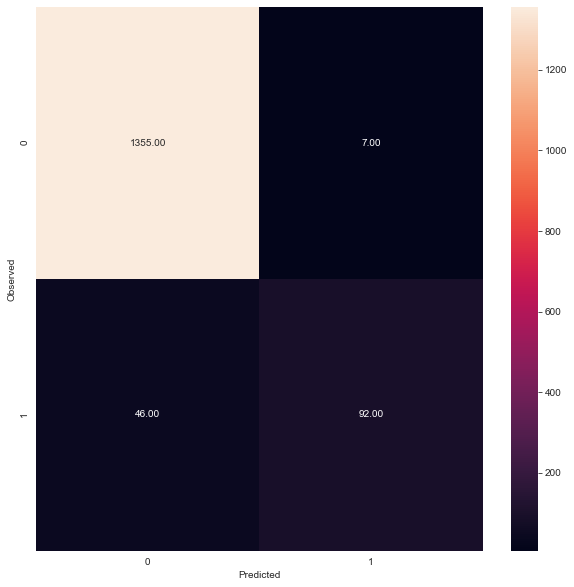

In [262]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
draw_cm(Y_test,Y_pred)

Without any changes
recall_Score    : 0.2826086956521739

accuracy_score  : 0.9153333333333333

precision_score : 0.582089552238806

f1_score        : 0.38048780487804873

roc_auc_score   : 0.6310253463576582
array([[1334,   28],
       [  99,   39]],)
TN = 1334
TP = 39
FP = 28
FN = 99

After Dropping the ZIP Code 
recall_Score    : 0.6521739130434783

accuracy_score  : 0.958

precision_score : 0.8571428571428571

f1_score        : 0.7407407407407407

roc_auc_score   : 0.8205803485922237
array([[1347,   15],
       [  48,   90]],)
TN = 1347
TP = 90
FP = 15
FN = 48

After Dropping the Mortgage
recall_Score    : 0.6666666666666666

accuracy_score  : 0.9646666666666667

precision_score : 0.9292929292929293

f1_score        : 0.7763713080168776

roc_auc_score   : 0.830763582966226
array([[1355,    7],
       [  46,   92]],
TN = 1355
TP = 92
FP = 7
FN = 46       

Find out coefficients of all the attributes and show the output in a data frame with column names

In [263]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
8,Education_Undergrad,3.88
10,CD Account_1,2.42
5,Family_3,1.58
6,Family_4,1.48
12,CreditCard_1,0.69
11,Online_1,0.43
4,Family_2,0.31
0,Age,0.30
1,Experience,0.30
7,Education_Graduate,0.28


For test data show all the rows where the predicted class is not equal to the observed class.

In [264]:
z = X_test.copy()
z['Observed P Loan Status'] = Y_test
z['Predicted P Loan Status'] = Y_pred
z[z['Observed P Loan Status'] !=  z['Predicted P Loan Status']]


,Age,Experience,Income,CCAvg,Family_2,Family_3,Family_4,Education_Graduate,Education_Undergrad,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Observed P Loan Status,Predicted P Loan Status
4301,49,24,130,1.10,0,0,1,0,1,0,1,1,0,1,0
4575,53,27,115,0.50,1,0,0,0,0,0,0,0,0,1,0
3383,46,22,135,4.10,0,1,0,0,1,0,0,1,0,1,0
2304,27,2,170,4.70,0,1,0,0,1,0,0,1,0,1,0
1731,43,19,125,2.40,0,1,0,0,1,0,0,1,0,1,0
1901,43,19,201,6.67,1,0,0,0,1,1,0,1,0,0,1
3571,42,18,153,5.60,0,1,0,0,1,0,0,0,0,1,0
2996,42,18,103,3.33,0,0,0,0,1,1,1,1,1,1,0
3983,39,13,93,3.60,0,0,1,0,0,0,0,1,0,1,0
1793,35,9,113,0.80,0,1,0,0,0,0,0,1,0,1,0


Confusion matrix means
True Positive (observed=1,predicted=1):
    
Predicted that 92 clients will take the personal loan

False Positive (observed=0,predicted=1):
predicted that 7 clients will take the personal loan but they didnt take    

True Negative (observed=0,predicted=0):
Predicted that 1355 clients will not take loan

False Negative (observed=1,predicted=0):
predicted that 46 clients doesnt take the personal loan but they took the personal loan.


Important Features
"Undergrad Education", "Clients has CD account", "Famliy with three members" and "Family with 4 members"
seems to be the top features which influence the model's output. Based on the coefficients values.

Clients uses the creditcard, online platform seems to have the considerable influence on the model.

Clients with family members of 2, expericne, age and graduate education of the client has less influence on the model.

Clients Credit Card Average, clients has secutiry account and income  doesn't seems to have any impact on the model.

Important Metric
Based on on the confusion metrx,
Bank should try to perform the campign to gain more clients to open the personal loan.